# Visualisation d'une classification par arbre de décision

## Importation des librairies##
Il faut installer graphviz pour faire tourner ce code.<br> 
https://graphviz.org/download/

In [1]:
%matplotlib inline
import numpy as np
import os
from IPython.display import Image
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

## Chargement du Dataset Iris##

In [2]:
iris = load_iris()

In [3]:
iris.feature_names=['Longueur Sépale (cm)', 'Largeur Sépale (cm)', 'Longueur Pétale (cm)', 'Largeur Pétale (cm)']
features = iris.data # Longueur et largeur petales/sepales
labels = iris.target
print(iris.feature_names)
print(features[0:3,:])
print(iris.target_names)
print(labels[0:3])

['Longueur Sépale (cm)', 'Largeur Sépale (cm)', 'Longueur Pétale (cm)', 'Largeur Pétale (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0]


## Apprentissage de l'arbre de décision ##

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42) 
tree_clf.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

## Creation d'un graphe au format "dot" avec graphviz##

In [5]:
export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

## Transformation du fichier dot en png, puis affichage

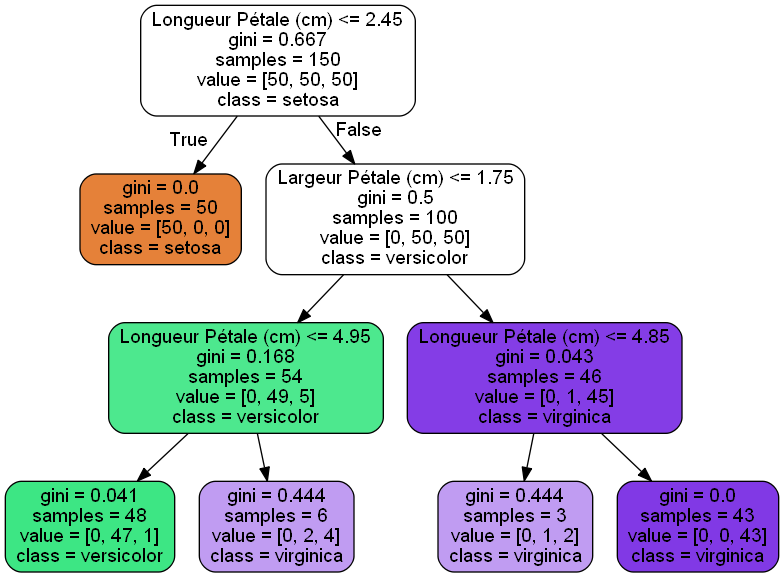

In [6]:
#appel à la fonction dot de graphwiz
os.system("dot -Tpng iris_tree.dot -o iris_tree.png") 
#Affichage de l'image créée
Image("iris_tree.png")

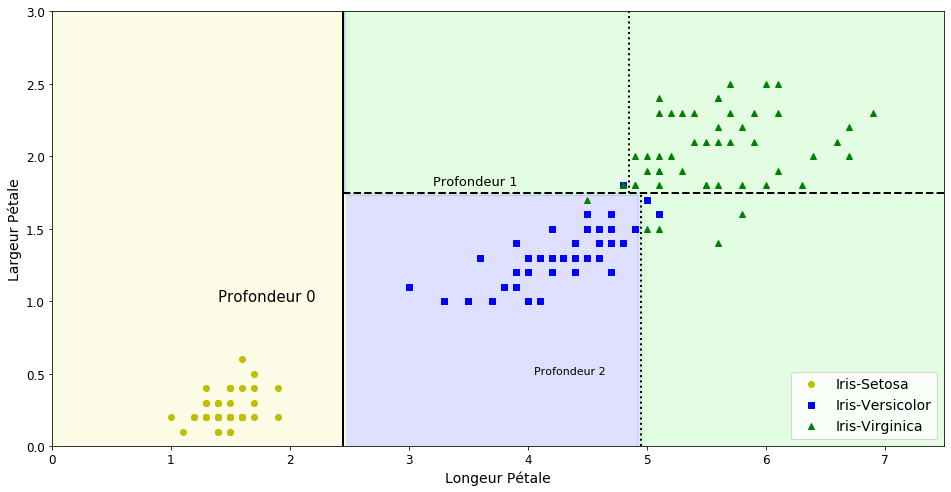

In [7]:
 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.figure(figsize=(16, 8))

#Création de valeurs à partir des axes
axes=[0, 7.5, 0, 3]   
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel(),x1.ravel(), x2.ravel()]

#Exécution du modèle
y_pred = tree_clf.predict(X_new).reshape(x1.shape)

#Création d'une ColorMap et affichage des zones colorées
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

# Affichage de chaque iris
plt.plot(features[:, 2][labels==0], features[:, 3][labels==0], "yo", label="Iris-Setosa")
plt.plot(features[:, 2][labels==1], features[:, 3][labels==1], "bs", label="Iris-Versicolor")
plt.plot(features[:, 2][labels==2], features[:, 3][labels==2], "g^", label="Iris-Virginica")

# Affichage des lignes de séparations
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Profondeur 0", fontsize=15)
plt.text(3.2, 1.80, "Profondeur 1", fontsize=13)
plt.text(4.05, 0.5, "Profondeur 2", fontsize=11)

# Affichage des axes
plt.axis(axes)
plt.xlabel("Longeur Pétale", fontsize=14)
plt.ylabel("Largeur Pétale", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()